In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
music_df = pd.read_csv('../data/music.csv', header=None)

display(music_df.head())

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


# Pre Processing

In [98]:
def train_test_split(df, test_size=0.2):
    df = df.sample(frac=1)
    test_set_size = int(len(df) * test_size)
    test_set = df[:test_set_size]
    train_set = df[test_set_size:]
    return train_set, test_set

In [99]:
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def standardize(df):
    return (df - df.mean()) / df.std()

In [100]:
df_train, df_test = train_test_split(music_df)
last_column = df_train.columns[-1]
X_train, y_train = df_train.drop(last_column, axis=1), df_train[last_column]
X_test, y_test = df_test.drop(last_column, axis=1), df_test[last_column]

In [101]:
norm_train_df = normalize(X_train)
norm_test_df = normalize(X_test)

In [102]:
# Train Normalization
X_train = normalize(X_train)
y_train = normalize(y_train)
X_test = normalize(X_test)
y_test = normalize(y_test)

In [103]:
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
240,0.216201,0.122076,0.225666,0.427633,0.720225,0.365698,0.737700,0.661857,0.609458,0.794021,...,0.216310,0.178436,0.244188,0.225074,0.221475,0.258512,0.054518,0.221207,0.088191,0.857968
546,0.070852,0.046007,0.036030,0.426295,0.310582,0.743149,0.748821,0.672679,0.563858,0.714255,...,0.435943,0.256959,0.331097,0.258652,0.160079,0.133002,0.126821,0.115896,0.143689,0.788842
370,0.119112,0.101279,0.102880,0.476617,0.747542,0.619406,0.654462,0.488800,0.472497,0.559657,...,0.378007,0.238540,0.212884,0.110041,0.239065,0.170709,0.118107,0.066627,0.125491,0.217271
838,0.285835,0.261062,0.179585,0.352819,0.876327,0.304353,0.358425,0.460675,0.358986,0.590777,...,0.207914,0.320021,0.341768,0.259475,0.425309,0.389944,0.248897,0.351465,0.196024,0.710269
343,0.093028,0.080510,0.078218,0.561805,0.640062,0.754829,0.533456,0.646624,0.496162,0.692429,...,0.238411,0.182564,0.211123,0.063857,0.085344,0.260954,0.174205,0.108147,0.217274,0.532896


# Running the Neural Network

## Model Testing

In [104]:
import sys

sys.path.append('../')
from mlp_keras import MLP

## Parameter Testing

In [105]:
momentum_values = [0.1, 0.5, 0.9]
learning_rate_values = [0.05, 0.1, 0.25]
epoch_values = [50,100, 500]
hidden_layers_cfg = [[{'units': 13, 'activation': 'relu'}], [{'units': 13, 'activation': 'relu'}, {'units': 13, 'activation': 'sigmoid'}]]

In [106]:
from sklearn.metrics import (mean_squared_error)

def model_scores(y_true, y_pred) -> dict:
    mse = mean_squared_error(y_true, y_pred)

    return {"mse": mse}

In [107]:
history = {}

def train_model(momentum, lr, epochs, hidden_layers):
    key_value = ((momentum), (lr), (epochs), (len(hidden_layers)))
    print("Training model with key:", key_value)
    clf = MLP(X_dim=len(X_test.columns), y_dim=1, hidden_layers=hidden_layers, lr=lr, momentum=momentum)
    clf.fit(X_train, y_train, epochs=epochs, verbose=False)
    y_pred = clf.predict(X_test)
    history[key_value] = model_scores(y_test, y_pred)

In [108]:
total_combinations = len(momentum_values) * len(learning_rate_values) * len(epoch_values) * len(hidden_layers_cfg)
current = 0

for momentum in momentum_values:
    for lr in learning_rate_values:
        for epochs in epoch_values:
            for hidden_layers in hidden_layers_cfg:
                print(f"Training model {current}/{total_combinations}")
                current += 1
                train_model(momentum, lr, epochs, hidden_layers)

Training model 0/54
Training model with key: (0.1, 0.05, 50, 1)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 1/54
Training model with key: (0.1, 0.05, 50, 2)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training model 2/54
Training model with key: (0.1, 0.05, 100, 1)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 3/54
Training model with key: (0.1, 0.05, 100, 2)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 4/54
Training model with key: (0.1, 0.05, 500, 1)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 5/54
Training model with key: (0.1, 0.05, 500, 2)
{'lr': 0.05, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 6/54
Training model with key: (0.1, 0.1, 50, 1)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 7/54
Training model with key: (0.1, 0.1, 50, 2)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 8/54
Training model with key: (0.1, 0.1, 100, 1)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 9/54
Training model with key: (0.1, 0.1, 100, 2)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 10/54
Training model with key: (0.1, 0.1, 500, 1)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 11/54
Training model with key: (0.1, 0.1, 500, 2)
{'lr': 0.1, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 12/54
Training model with key: (0.1, 0.25, 50, 1)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 13/54
Training model with key: (0.1, 0.25, 50, 2)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 14/54
Training model with key: (0.1, 0.25, 100, 1)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 15/54
Training model with key: (0.1, 0.25, 100, 2)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training model 16/54
Training model with key: (0.1, 0.25, 500, 1)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 17/54
Training model with key: (0.1, 0.25, 500, 2)
{'lr': 0.25, 'momentum': 0.1}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 18/54
Training model with key: (0.5, 0.05, 50, 1)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 19/54
Training model with key: (0.5, 0.05, 50, 2)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 20/54
Training model with key: (0.5, 0.05, 100, 1)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 21/54
Training model with key: (0.5, 0.05, 100, 2)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training model 22/54
Training model with key: (0.5, 0.05, 500, 1)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 23/54
Training model with key: (0.5, 0.05, 500, 2)
{'lr': 0.05, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 24/54
Training model with key: (0.5, 0.1, 50, 1)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 25/54
Training model with key: (0.5, 0.1, 50, 2)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 26/54
Training model with key: (0.5, 0.1, 100, 1)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 27/54
Training model with key: (0.5, 0.1, 100, 2)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 28/54
Training model with key: (0.5, 0.1, 500, 1)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 29/54
Training model with key: (0.5, 0.1, 500, 2)
{'lr': 0.1, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 30/54
Training model with key: (0.5, 0.25, 50, 1)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 31/54
Training model with key: (0.5, 0.25, 50, 2)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 32/54
Training model with key: (0.5, 0.25, 100, 1)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 33/54
Training model with key: (0.5, 0.25, 100, 2)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 34/54
Training model with key: (0.5, 0.25, 500, 1)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 35/54
Training model with key: (0.5, 0.25, 500, 2)
{'lr': 0.25, 'momentum': 0.5}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 36/54
Training model with key: (0.9, 0.05, 50, 1)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 37/54
Training model with key: (0.9, 0.05, 50, 2)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 38/54
Training model with key: (0.9, 0.05, 100, 1)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 39/54
Training model with key: (0.9, 0.05, 100, 2)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model 40/54
Training model with key: (0.9, 0.05, 500, 1)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 41/54
Training model with key: (0.9, 0.05, 500, 2)
{'lr': 0.05, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 42/54
Training model with key: (0.9, 0.1, 50, 1)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 43/54
Training model with key: (0.9, 0.1, 50, 2)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 44/54
Training model with key: (0.9, 0.1, 100, 1)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 45/54
Training model with key: (0.9, 0.1, 100, 2)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 46/54
Training model with key: (0.9, 0.1, 500, 1)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 47/54
Training model with key: (0.9, 0.1, 500, 2)
{'lr': 0.1, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 48/54
Training model with key: (0.9, 0.25, 50, 1)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 49/54
Training model with key: (0.9, 0.25, 50, 2)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model 50/54
Training model with key: (0.9, 0.25, 100, 1)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model 51/54
Training model with key: (0.9, 0.25, 100, 2)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model 52/54
Training model with key: (0.9, 0.25, 500, 1)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model 53/54
Training model with key: (0.9, 0.25, 500, 2)
{'lr': 0.25, 'momentum': 0.9}


/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


KeyboardInterrupt: 

In [110]:
display(scores_df)

mse
0.1 0.05 50  1  0.035992
             2  0.038890
         100 1  0.037685
             2  0.037536
         500 1  0.049447
             2  0.039996
    0.10 50  1  0.036564
             2  0.038047
         100 1  0.039149
             2  0.034613
         500 1  0.047745
             2  0.042255
    0.25 50  1  0.038426
             2  0.045271
         100 1  0.035277
             2  0.033814
         500 1  0.058700
             2  0.035535
0.5 0.05 50  1  0.038617
             2  0.037092
         100 1  0.035251
             2  0.036526
         500 1  0.064455
             2  0.045849
    0.10 50  1  0.034015
             2  0.037374
         100 1  0.044936
             2  0.045741
         500 1  0.092472
             2  0.074127
    0.25 50  1  0.034604
             2  0.036096
         100 1  0.033939
             2  0.034427
         500 1  0.053002
             2  0.090283
0.9 0.05 50  1  0.042530
             2  0.052053
         100 1  0.035440
             2  0.037760
         500 1  0.053328
             2  0.048124
    0.10 50  1  0.043406
             2  0.039910
         100 1  0.054062
             2  0.043157
         500 1  0.067967
             2  0.070129
    0.25 50  1  0.047805
             2  0.052763
         100 1  0.093346
             2  0.037238
         500 1  0.049160

In [111]:
scores_df = pd.DataFrame(history).T
scores_df.reset_index(inplace=True)
columns = ['momentum', 'lr', 'epoch', 'hidden dim', 'mse']
scores_df.columns = columns
display(scores_df)

,momentum,lr,epoch,hidden dim,mse
0,0.1,0.05,50,1,0.035992
1,0.1,0.05,50,2,0.038890
2,0.1,0.05,100,1,0.037685
3,0.1,0.05,100,2,0.037536
4,0.1,0.05,500,1,0.049447
5,0.1,0.05,500,2,0.039996
6,0.1,0.10,50,1,0.036564
7,0.1,0.10,50,2,0.038047
8,0.1,0.10,100,1,0.039149
9,0.1,0.10,100,2,0.034613


In [112]:
print("Best 5 models")
display(scores_df.sort_values(by='mse').head())

Best 5 models


,momentum,lr,epoch,hidden dim,mse
15,0.1,0.25,100,2,0.033814
32,0.5,0.25,100,1,0.033939
24,0.5,0.10,50,1,0.034015
33,0.5,0.25,100,2,0.034427
30,0.5,0.25,50,1,0.034604


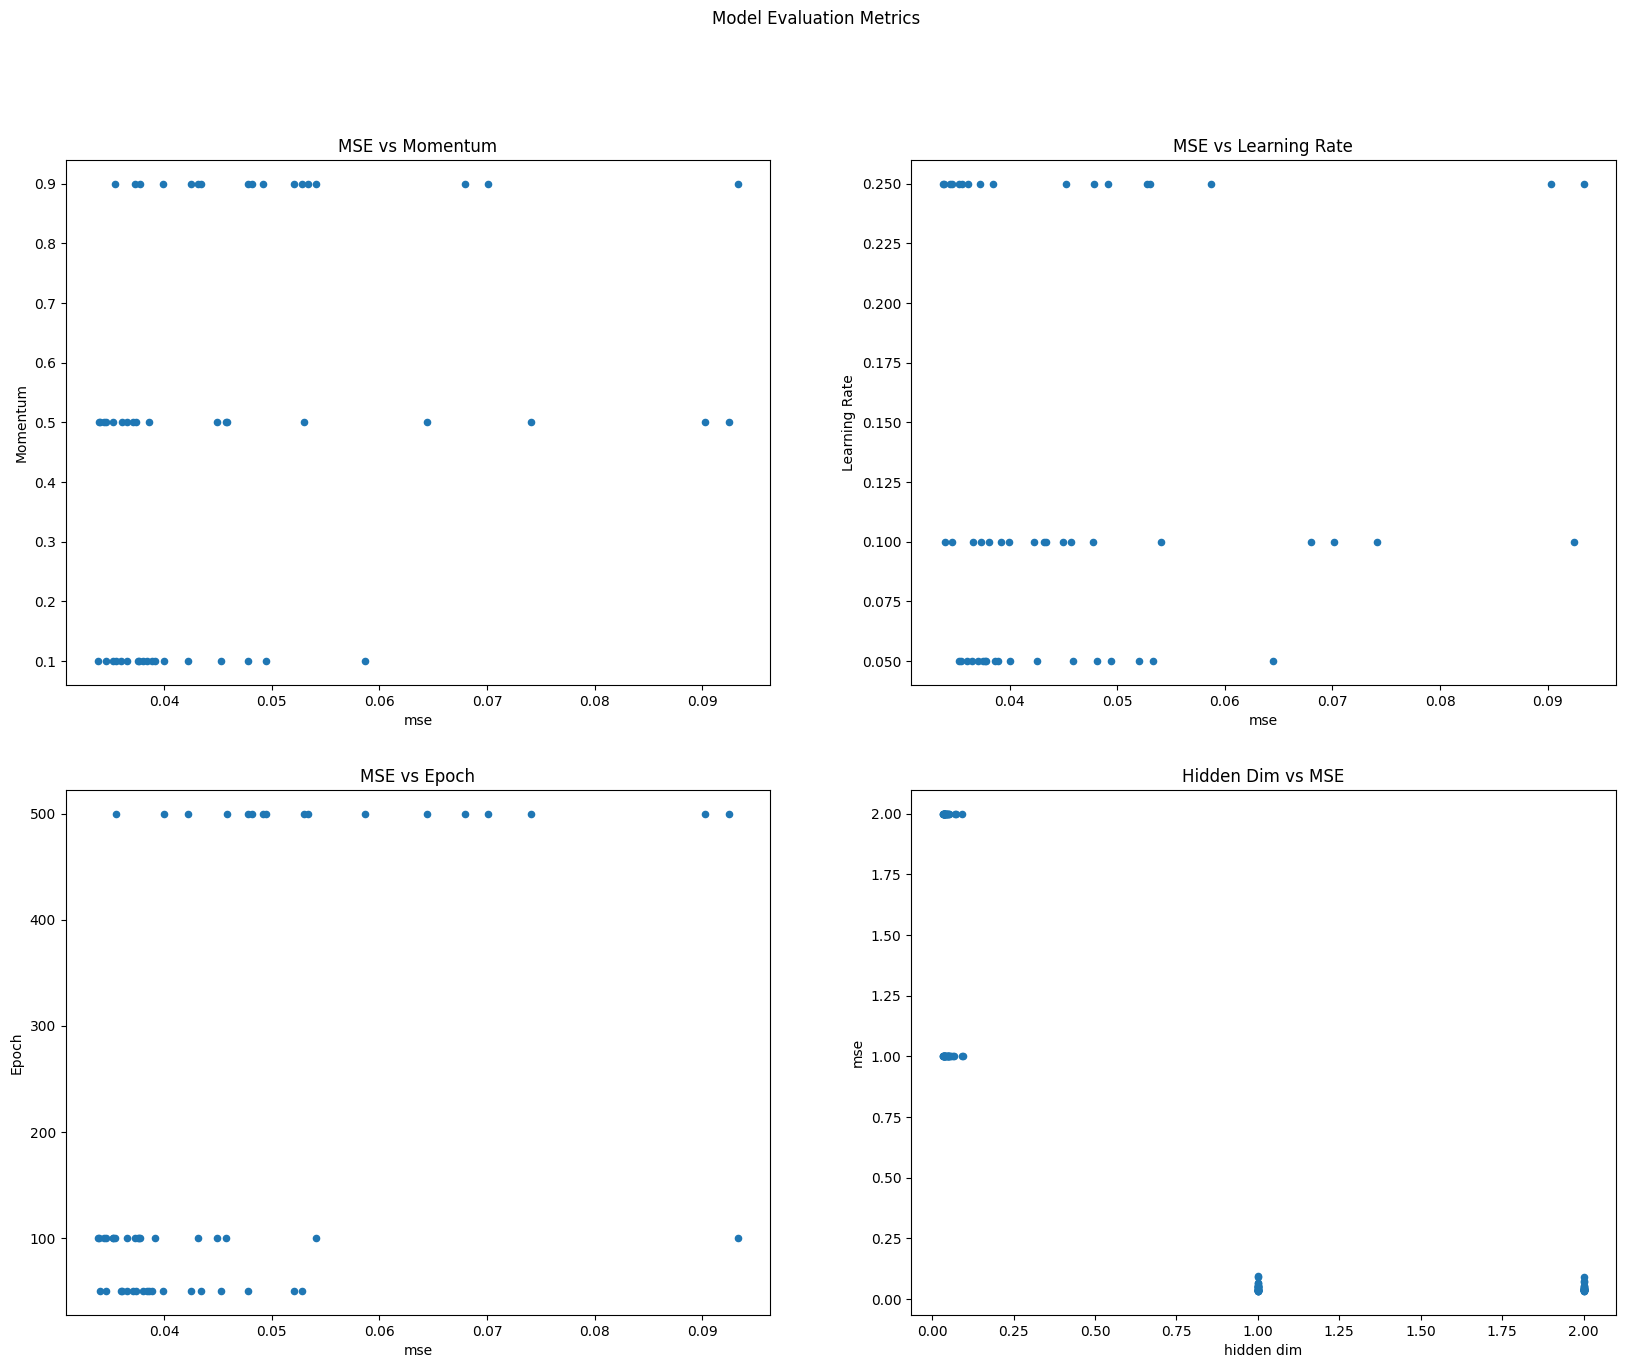

<Figure size 640x480 with 0 Axes>

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Model Evaluation Metrics')
scores_df.plot.scatter(ax=axes[0, 0], x='mse', y='momentum')
axes[0][0].set_title('MSE vs Momentum')
axes[0][0].set_xlabel('mse')
axes[0][0].set_ylabel('Momentum')

scores_df.plot.scatter(ax=axes[0, 1], x='mse', y='lr')
axes[0][1].set_title('MSE vs Learning Rate')
axes[0][1].set_xlabel('mse')
axes[0][1].set_ylabel('Learning Rate')

scores_df.plot.scatter(ax=axes[1, 0], x='mse', y='epoch')
axes[1][0].set_title('MSE vs Epoch')
axes[1][0].set_xlabel('mse')
axes[1][0].set_ylabel('Epoch')

scores_df.plot.scatter(ax=axes[1, 1], x='mse', y='hidden dim')
axes[1][1].set_title('MSE vs Hidden Layer Dimension')
axes[1][1].set_xlabel('mse')
axes[1][1].set_ylabel('Hidden Layer Dimension')

scores_df.plot(x='hidden dim', y='mse', kind='scatter', ax=axes[1, 1], title='Hidden Dim vs MSE')

plt.show()